In [2]:
from typing import Dict, TypedDict, List
from langgraph.graph import StateGraph, START, END
import random

In [3]:
class AgentState(TypedDict):
    name : str
    number : List[int]
    counter : int

In [4]:
def greeter(state : AgentState):
    state['name'] = f'Hi there, {state["name"]}'
    state['counter'] = 0
    return state


def generator(state : AgentState):
    state['number'].append(random.randint(0,10))
    state['counter'] += 1
    return state

def router(state : AgentState) -> str:
    if state['counter'] == 5:
        return "exit"
    else:
        return "loop"

In [5]:
graph = StateGraph(AgentState)

graph.add_node("greeter", greeter)
graph.add_node("generator", generator)

graph.set_entry_point("greeter")
graph.add_edge("greeter", "generator")

graph.add_conditional_edges(
    "generator",
    router,  
    {
        "loop" : "generator",
        "exit" : END
    }
)

app = graph.compile()

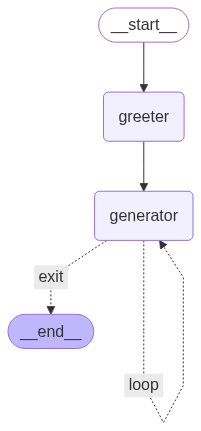

In [6]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png(max_retries=5, retry_delay=2.0)))


In [7]:
result = app.invoke({"name" : "Yash", "number" : []})
result

{'name': 'Hi there, Yash', 'number': [9, 8, 2, 8, 4], 'counter': 5}